In [1]:
import pandas as pd
import re

# Helper functions and common parameters

## Define topic to keywords
This is based on the exploration of the article titles.

In [3]:
topic2keywords= {
    'reinforcement learning': ['reinforcement learning', 'deep reinforcement', 'agent',  'deep reinforcement learning', 'reinforcement', 'off-policy'], # , 'rl'
    'graph': ['graph', 'graphs',  'graph neural networks',  'knowledge graph',  'graph convolutional',  'graph convolutional network',  'graph representation learning',],
    'optimization': ['optimization',  'constrain',],
    'zero_few-shot': ['low',  'shot learning',  'zero-shot',  'weak', 'few-shot learning', 'self-supervised',],
    'transformer': ['transformer', 'attention',  'vision transformers',  'transformers',  'bert', 'scaling'],
    'representation': ['representation', 'graph representation learning',  'representations',],
    'generative model': ['generative model','generation', 'generative', 'generative models',],
    'online learning': ['online learning', 'online'],
    'adaptive': ['adaptive'],
    'bayesian': ['bayes', 'bayesian'],  # new
    'contrastive learning': ['contrastive',  'contrastive learning',], 
    'inference': ['inference'],
    'metric': ['metric'],
    'meta-learning': ['meta-learning', 'meta'],
    'sparse': ['sparse'],
    'transfer learning': ['transfer',  'transferable'],
    'active learning': ['active',  'active learning',],
    'flow': ['flow'],
    'augmentation': ['augmentation', 'augmented'],
    'federated learning': ['federated learning', ],
    'distillation':  [ 'distillation', 'knowledge distillation',  'distil'],
    'multi-agent': ['multi-agent'],
    'segmentation': ['segmentation'],
    'multi-task': ['multi-task'],
    'multimodal':  ['multimodal', 'multi-modal'],
    'imitation learning': ['imitation learning'],  # new
    'low-rank': ['low-rank'],
    'multi-view': ['multi-view'],
    'diffusion models': [ 'diffusion models'],  # new
} ## to be recalled for any occorence

## Helper functions

### Obtain keywords

In [4]:
# ! pip install spacy 
# ! pip install /home/xux/Desktop/AI-trends-in-conferences/data/en_core_sci_lg-0.5.1.tar.gz

In [5]:
import spacy
from spacy import displacy
from collections import Counter

# nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_sci_lg")

def get_keyword_by_spacy(text):
    doc = nlp(text)
    keywords = [X.text for X in doc.ents]
    return keywords

In [6]:
import operator

def count_keywords(df, kw):
    return sum([1 for title in df.title_processed if kw in title ])

def obtain_cadidate_keywords(df, threshould=5):
    full_titles = '. '.join(df['title_processed'].tolist())
    keywords = list(set(get_keyword_by_spacy(full_titles)))
    
    kw_counts = {kw: count_keywords(df, kw)for kw in keywords}
    kw_cadidate_counts = { kw: kw_counts[kw] for kw in kw_counts.keys() if kw_counts[kw] > threshould}

    # explore this dict to obtain topic2keyword
    kw_cadidate_counts_sorted = dict(sorted(kw_cadidate_counts.items(), key=operator.itemgetter(1),reverse=True)) 

    print(f"total {len(kw_counts)} keywords, {len(kw_cadidate_counts_sorted)} candidates after filtering")
    return kw_cadidate_counts_sorted

### Assign topics

In [7]:
def obtain_topic_for_text(text):
    topic = []
    for t in topic2keywords.keys():
        for key in topic2keywords[t]:
            if key in text:
                topic.append(t)
                break
    return '/'.join(topic)

# ICLR

In [8]:
def format_ICLR_data_to_df(raw_path, source='ICLR', year=2022, present='oral'):
    save_path = raw_path + '_df.csv'
    
    file1 = open(raw_path, 'r')
    Lines = file1.readlines()

    title, authors = [], []

    record_counter = 1
    # Strips the newline character
    for line in Lines:
        if record_counter == 1:
            title.append(line.strip())
        elif record_counter == 2:
            authors.append(line.strip())
        elif 'Show details' in line:
            record_counter = 0
        record_counter += 1

    article_year = [year] * len(title)
    article_source = [source] * len(title)
    article_class = [present] * len(title)


    data_frame = pd.DataFrame({'Title':title, 'Year': article_year, 'Source': article_source, 'Authors': authors, 'Class': article_class})
    return data_frame

def remove_duplicates(data_frame):
    raw_length = len(data_frame)
    data_frame = data_frame.drop_duplicates(subset = "Title")
    print(f"Totally {raw_length} papers, {len(data_frame)} left after remve duplicates.")
    return data_frame

def merge_data2df(oral='./data/ICLR/2022-ICLR-oral.txt', poster='./data/ICLR/2022-ICLR-poster.txt', spotlight='./data/ICLR/2022-ICLR-spotlight.txt'):
    df_ICLR_oral = format_ICLR_data_to_df(oral, present='oral')    
    df_ICLR_poster = format_ICLR_data_to_df(poster, present='poster')
    df_ICLR_spotlight = format_ICLR_data_to_df(spotlight, present='spotlight')

    df_ICLR = pd.concat([df_ICLR_oral, df_ICLR_spotlight, df_ICLR_poster])
    df_ICLR = remove_duplicates(df_ICLR)
    return df_ICLR

## ICLR 2022

In [9]:
df_ICLR_22 = merge_data2df(oral='./data/ICLR/2022-ICLR-oral.txt', poster='./data/ICLR/2022-ICLR-poster.txt', spotlight='./data/ICLR/2022-ICLR-spotlight.txt')
df_ICLR_22['title_processed'] = df_ICLR_22['Title'].map(lambda x: x.lower())

Totally 1094 papers, 1094 left after remve duplicates.


### Explore keywrods

In [10]:
full_titles = '. '.join(df_ICLR_22['title_processed'].tolist())
keywords = list(set(get_keyword_by_spacy(full_titles)))

In [11]:
kw_counts = {kw: count_keywords(df_ICLR_22, kw)for kw in keywords}
kw_cadidate_counts = { kw: kw_counts[kw] for kw in kw_counts.keys() if kw_counts[kw] > 5}

# explore this dict to obtain topic2keyword
kw_cadidate_counts_sorted = dict(sorted(kw_cadidate_counts.items(), key=operator.itemgetter(1),reverse=True)) 

len(kw_counts), len(kw_cadidate_counts_sorted)

(2215, 280)

Added classes:
- 'diffusion models': [ 'diffusion models'],  # new
- 'meta-learning': ['meta-learning', 'meta'],
- 'imitation learning': ['imitation learning'],  # new

### Assign topics

In [12]:
raw_path = "./data/ICLR/2022-ICLR"
df_ICLR_22['topic'] = [obtain_topic_for_text(text) for text in df_ICLR_22['title_processed']]
df_ICLR_22[['Title', 'Year', 'Source', 'Authors', 'Class', 'topic']].to_csv(raw_path + '_df_classified.csv')

## ICLR 2021

In [13]:
df_ICLR_21 = merge_data2df(oral='./data/ICLR/2021-ICLR-oral.txt', poster='./data/ICLR/2021-ICLR-poster.txt', spotlight='./data/ICLR/2021-ICLR-spotlight.txt')
df_ICLR_21['title_processed'] = df_ICLR_21['Title'].map(lambda x: x.lower())

Totally 860 papers, 860 left after remve duplicates.


### Explore keywrods

In [14]:
kw_cadidate_counts_sorted = obtain_cadidate_keywords(df_ICLR_21)

total 1710 keywords, 217 candidates after filtering


In [15]:
# kw_cadidate_counts_sorted

### Assign topics

In [16]:
raw_path = "./data/ICLR/2021-ICLR"

df_ICLR_21['topic'] = [obtain_topic_for_text(text) for text in df_ICLR_21['title_processed']]
df_ICLR_21[['Title', 'Year', 'Source', 'Authors', 'Class', 'topic']].to_csv(raw_path + '_df_classified.csv')

# NeuralIPS

## NeuralIPS 2021

In [17]:
def format_NIPS_data_to_df(raw_path, source='NIPS', year=2021, present='oral'):
    save_path = raw_path + '_df.csv'
    
    file1 = open(raw_path, 'r')
    Lines = file1.readlines()

    title, authors = [], []

    record_counter = 1
    # Strips the newline character
    for line in Lines:
        if record_counter == 1:
            title.append(line.strip())
        elif record_counter == 2:
            authors.append(line.strip())
        elif 'Show details' in line:
            record_counter = 0
        record_counter += 1

    article_year = [year] * len(title)
    article_source = [source] * len(title)
    article_class = [present] * len(title)


    data_frame = pd.DataFrame({'Title':title, 'Year': article_year, 'Source': article_source, 'Authors': authors, 'Class': article_class})
    return data_frame

def remove_duplicates(data_frame):
    raw_length = len(data_frame)
    data_frame = data_frame.drop_duplicates(subset = "Title")
    print(f"Totally {raw_length} papers, {len(data_frame)} left after remve duplicates.")
    return data_frame

def merge_data2df(oral='./data/ICLR/2022-ICLR-oral.txt', poster='./data/ICLR/2022-ICLR-poster.txt', spotlight='./data/ICLR/2022-ICLR-spotlight.txt'):
    df_ICLR_oral = format_NIPS_data_to_df(oral, present='oral')    
    df_ICLR_poster = format_NIPS_data_to_df(poster, present='poster')
    df_ICLR_spotlight = format_NIPS_data_to_df(spotlight, present='spotlight')

    df_ICLR = pd.concat([df_ICLR_oral, df_ICLR_spotlight, df_ICLR_poster])
    df_ICLR = remove_duplicates(df_ICLR)
    return df_ICLR

In [18]:
df_NIPS21 = merge_data2df(oral='./data/NeuralIPS/21-NIPS-oral.txt', poster='./data/NeuralIPS/21-NIPS-poster.txt', spotlight='./data/NeuralIPS/21-NIPS-spotlight.txt')
df_NIPS21['title_processed'] = df_NIPS21['Title'].map(lambda x: x.lower())

Totally 2630 papers, 2333 left after remve duplicates.


In [19]:
kw_cadidate_counts_sorted = obtain_cadidate_keywords(df_NIPS21)

total 3925 keywords, 601 candidates after filtering


In [20]:
# kw_cadidate_counts_sorted

In [21]:
raw_path = "./data/NeuralIPS/2021-NIPS"

df_NIPS21['topic'] = [obtain_topic_for_text(text) for text in df_NIPS21['title_processed']]
df_NIPS21[['Title', 'Year', 'Source', 'Authors', 'Class', 'topic']].to_csv(raw_path + '_df_classified.csv')

# AAAI

## AAAI 2022

### load local data
- Original format:

Training a Resilient Q-Network against Observational Interference <br />
Chao-Han Huck Yang, I-Te Danny Hung, Yi Ouyang, Pin-Yu Chen<br />
[AAAI-22] MAIN TRACK

- Saved format:
   
| Title | Year | Source | Authors | Class |

In [22]:
def format_AAAI22_data_to_df(raw_path, source='AAAI', year=2022, mark='[AAAI-22]'):
    save_path = raw_path + '_df.csv'
    
    file1 = open(raw_path, 'r')
    Lines = file1.readlines()

    title, authors, article_class = [], [], []

    record_counter = 1
    # Strips the newline character
    for line in Lines:
        if record_counter == 1:
            title.append(line.strip())
        elif record_counter == 2:
            authors.append(line.strip())
        elif mark in line:
            article_class.append(line[len(mark):].strip())
            record_counter = 0
        record_counter += 1

    article_year = [year] * len(title)
    article_source = [source] * len(title)

    data_frame = pd.DataFrame({'Title':title, 'Year': article_year, 'Source': article_source, 'Authors': authors, 'Class': article_class})

    raw_length = len(data_frame)
    data_frame = data_frame.drop_duplicates(subset = "Title")
    print(f"Totally {raw_length} papers, {len(data_frame)} left after remve duplicates.")
    data_frame.to_csv(save_path, index=False)
    return data_frame

In [23]:
raw_path = './data/AAAI/AAAI-2022.txt'

df_AAAI22 = format_AAAI22_data_to_df(raw_path)
df_AAAI22['title_processed'] = df_AAAI22['Title'].map(lambda x: x.lower())

Totally 1552 papers, 1552 left after remve duplicates.


### Assign topics by keywords

#### Obtain ALL keywords from titles

In [24]:
full_titles = '. '.join(df_AAAI22['title_processed'].tolist())

In [25]:
keywords = list(set(get_keyword_by_spacy(full_titles)))

#### Explore keywords with occurence greater than 5

In [26]:


kw_counts = {kw: count_keywords(df_AAAI22, kw)for kw in keywords}
kw_cadidate_counts = { kw: kw_counts[kw] for kw in kw_counts.keys() if kw_counts[kw] > 5}

# explore this dict to obtain topic2keyword
kw_cadidate_counts_sorted = dict(sorted(kw_cadidate_counts.items(), key=operator.itemgetter(1),reverse=True)) 

len(kw_counts), len(kw_cadidate_counts_sorted)

(3242, 439)

#### Assign topics

In [27]:
df_AAAI22['topic'] = [obtain_topic_for_text(text) for text in df_AAAI22['title_processed']]
df_AAAI22[['Title', 'Year', 'Source', 'Authors', 'Class', 'topic']].to_csv(raw_path + '_df_classified.csv')

## AAAI 2021

In [28]:
# def format_AAAI21_data_to_df(raw_path, source='AAAI', year=2021):
#     mark=['[AAAI-22]']
#     save_path = raw_path + '_df.csv'
    
#     file1 = open(raw_path, 'r')
#     Lines = file1.readlines()

#     title, authors, article_class = [], [], []

#     record_counter = 1
#     # Strips the newline character
#     for line in Lines:
#         title_regex = re.compile()
        
#         if re.match(r"\d+\.", line):
#             title.append(line.strip())
#             prev_line = line.strip()
#         elif ',' in line or len(line.split(' ')) == 2:
#             authors.append(line.strip())
#             prev_line = line.strip()
#         elif mark in line:
#             article_class.append(line[len(mark):].strip())
#             record_counter = 0
#         else:
            
#         record_counter += 1

#     article_year = [year] * len(title)
#     article_source = [source] * len(title)

#     data_frame = pd.DataFrame({'Title':title, 'Year': article_year, 'Source': article_source, 'Authors': authors, 'Class': article_class})

#     raw_length = len(data_frame)
#     data_frame = data_frame.drop_duplicates(subset = "Title")
#     print(f"Totally {raw_length} papers, {len(data_frame)} left after remve duplicates.")
#     data_frame.to_csv(save_path, index=False)

In [29]:
# raw_path = './data/AAAI/AAAI-21.txt'
# format_AAAI21_data_to_df(raw_path)

In [30]:
# line = ' 4. 123'
# re.match(r"^\d+\.", line)

# ICML

In [31]:
def format_ICML_data_to_df(raw_path, source='ICML', year=2022):    
    file1 = open(raw_path, 'r')
    Lines = file1.readlines()

    title, authors, article_class = [], [], []

    record_counter = 0
    for line in Lines:        
        if bool(re.search(r"\d{1,2}:\d{1,2}", line)): # Start with the line with time
            record_counter = 1
        elif record_counter == 1 and 'Coffee Break' not in line and 'Lunch' not in line and 'Registration' not in line and 'Expo Demonstration' not in line and 'Workshop' not in line and '·' not in line:
            for i in range(len(title) - len(authors) - 1):
                authors.append("")
            for i in range(len(title) - len(article_class) - 1):
                article_class.append("")
            
            title.append(line.strip())
            record_counter += 1
        elif record_counter == 2:
            authors.append(line.strip())
            record_counter += 1
        elif record_counter == 3:
            article_class.append(line.strip())
            record_counter += 1
        else:
            "Some randome line here, just ignore"
        
    
    for i in range(len(title) - len(authors)):
        authors.append("")
    for i in range(len(title) - len(article_class)):
        article_class.append("")
    
    article_year = [year] * len(title)
    article_source = [source] * len(title)

    data_frame = pd.DataFrame({'Title':title, 'Year': article_year, 'Source': article_source, 'Authors': authors, 'Class': article_class})
    return data_frame

## ICML 2022

In [32]:
raw_path = "./data/ICML/ICML-22.txt"
df_ICML_22 = format_ICML_data_to_df(raw_path, source='ICML', year=2022)
df_ICML_22 = remove_duplicates(df_ICML_22)
df_ICML_22['title_processed'] = df_ICML_22['Title'].map(lambda x: x.lower())

Totally 2649 papers, 1379 left after remve duplicates.


In [33]:
kw_cadidate_counts_sorted = obtain_cadidate_keywords(df_ICML_22)

total 2524 keywords, 346 candidates after filtering


In [34]:
# kw_cadidate_counts_sorted

In [35]:
df_ICML_22['topic'] = [obtain_topic_for_text(text) for text in df_ICML_22['title_processed']]
df_ICML_22[['Title', 'Year', 'Source', 'Authors', 'Class', 'topic']].to_csv(raw_path + '_df_classified.csv')

## ICML 2021

In [36]:
raw_path = "./data/ICML/ICML-21.txt"
df_ICML_21 = format_ICML_data_to_df(raw_path, source='ICML', year=2021)
df_ICML_21 = remove_duplicates(df_ICML_21)
df_ICML_21['title_processed'] = df_ICML_21['Title'].map(lambda x: x.lower())

Totally 2617 papers, 1261 left after remve duplicates.


In [37]:
kw_cadidate_counts_sorted = obtain_cadidate_keywords(df_ICML_21)

total 2335 keywords, 313 candidates after filtering


In [38]:
df_ICML_21['topic'] = [obtain_topic_for_text(text) for text in df_ICML_21['title_processed']]
df_ICML_21[['Title', 'Year', 'Source', 'Authors', 'Class', 'topic']].to_csv(raw_path + '_df_classified.csv')

# Analyze Trend

In [39]:
def calculate_topic_frequency_ratio(df):
    topic2counts = {topic: 0 for topic in topic2keywords.keys()}

    for a_topic in df['topic']:
        topics = a_topic.split('/')
        for topic in topics:
            if topic == '':
                break
            topic2counts[topic] += 1

    topic2ratio = {topic: topic2counts[topic]/len(df) for topic in topic2counts.keys()}
    return list(topic2counts.keys()),list(topic2counts.values()), list(topic2ratio.values())  

In [40]:
import matplotlib.pyplot as plt

topics, AAAI22_freq, AAAI22_ratio = calculate_topic_frequency_ratio(df_AAAI22)
_, ICML22_freq, ICML22_ratio = calculate_topic_frequency_ratio(df_ICML_22)
_, ICML21_freq, ICML21_ratio = calculate_topic_frequency_ratio(df_ICML_21)
_, ICLR21_freq, ICLR21_ratio = calculate_topic_frequency_ratio(df_ICLR_21)
_, ICLR22_freq, ICLR22_ratio = calculate_topic_frequency_ratio(df_ICLR_22)
_, NIPS21_freq, NIPS21_ratio = calculate_topic_frequency_ratio(df_NIPS21)

## Hotest topics 

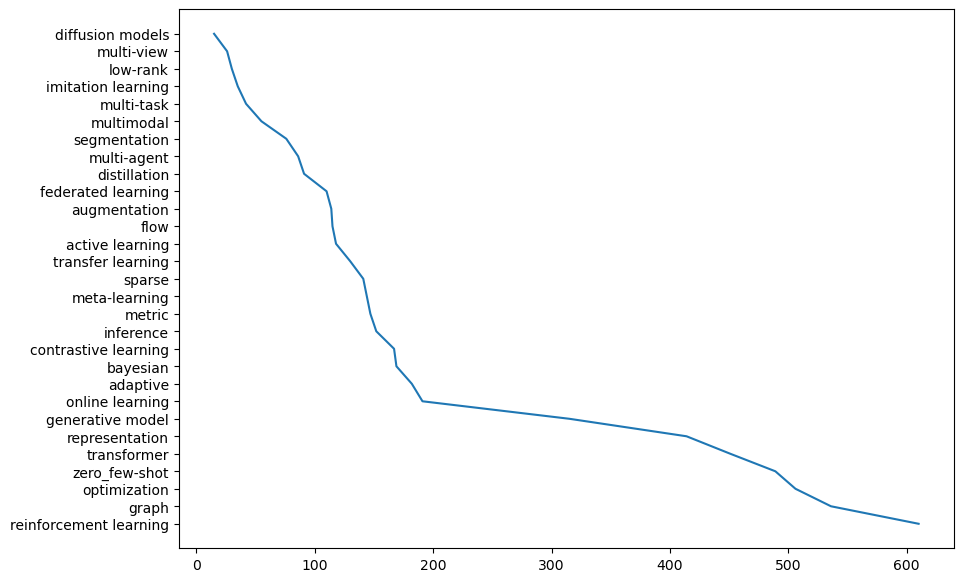

<Figure size 640x480 with 0 Axes>

In [48]:
import numpy as np

freqs = np.array(AAAI22_freq) + np.array(ICML22_freq) + np.array(ICML21_freq) + np.array(ICLR21_freq) + np.array(ICLR22_freq) + np.array(NIPS21_freq)
topic2freq = {topic:freq for topic, freq in zip(topics, freqs)}
topic2freq = dict(sorted(topic2freq.items(), key=operator.itemgetter(1),reverse=True)) 

plt.figure(figsize=(10,7))
plt.plot( topic2freq.values(), topic2freq.keys(),)
plt.show()
plt.savefig('./figures/Topics_summary.jpg', bbox_inches='tight')

## ICML 21 vs 22

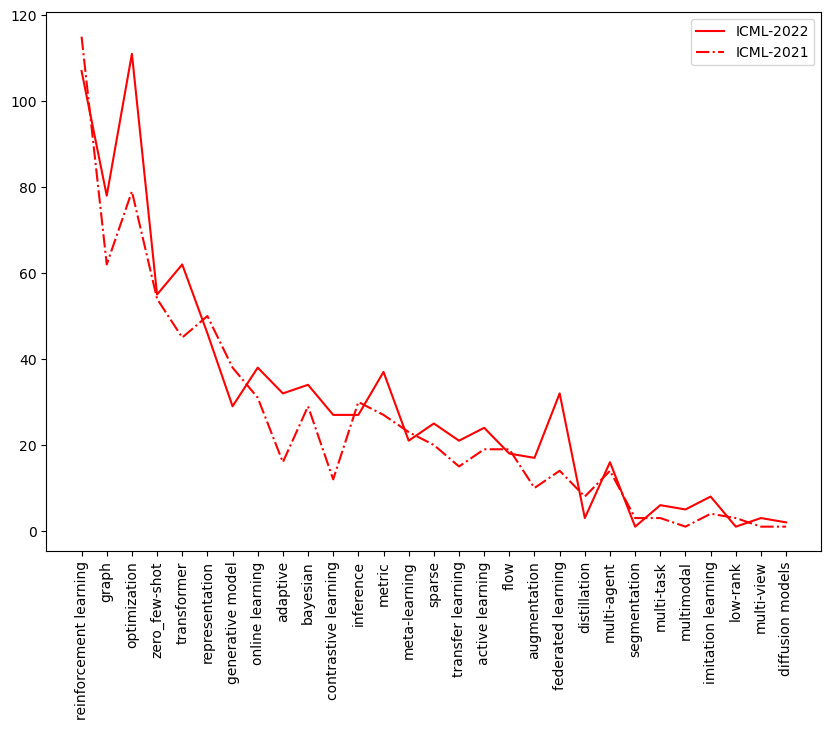

In [49]:
plt.figure(figsize=(10,7))
plt.plot(topics, ICML22_freq, label='ICML-2022', color='red')
plt.plot(topics, ICML21_freq, '-.', label='ICML-2021', color='red')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('./figures/ICML_trend.jpg')

## ICLR 21 vs 22

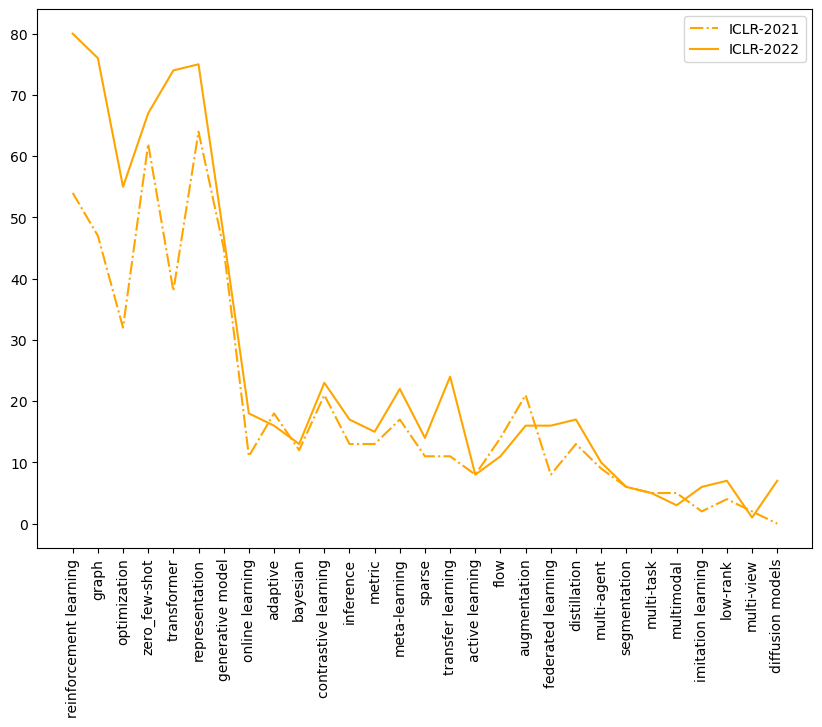

In [51]:
plt.figure(figsize=(10,7))
plt.plot(topics, ICLR21_freq, '-.', label='ICLR-2021', color='orange')
plt.plot(topics, ICLR22_freq, label='ICLR-2022', color='orange')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('./figures/ICLR_trend.jpg')

## 2022 ICML vs AAAI vs ICLR

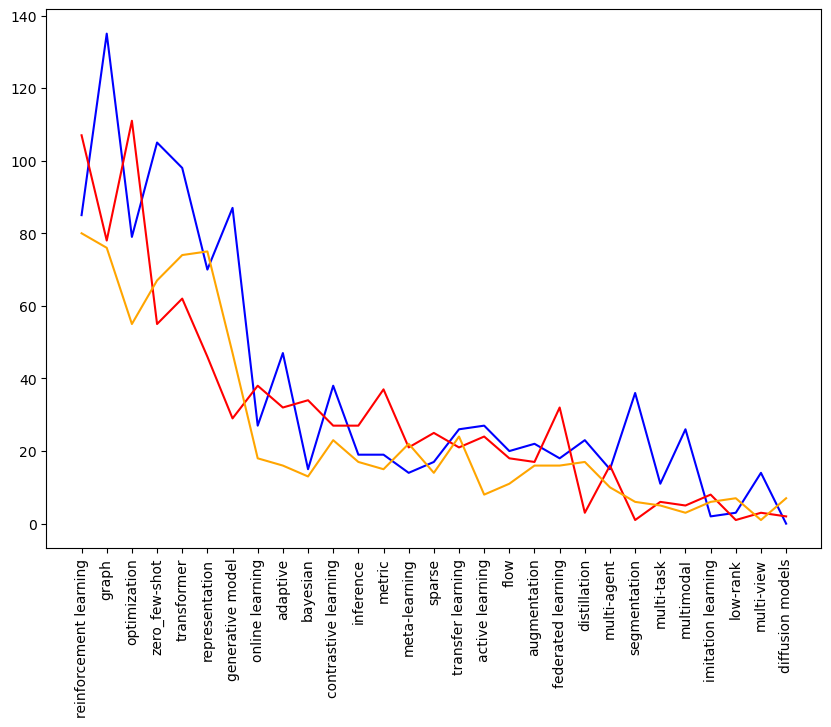

In [52]:
plt.figure(figsize=(10,7))
plt.plot(topics, AAAI22_freq, label='AAAI-2022', color='blue')
plt.plot(topics, ICML22_freq, label='ICML-2022', color='red')
plt.plot(topics, ICLR22_freq, label='ICLR-2022', color='orange')
plt.xticks(rotation=90)
plt.savefig('./figures/ICLR_AAAI_ICLR_cmp.jpg')

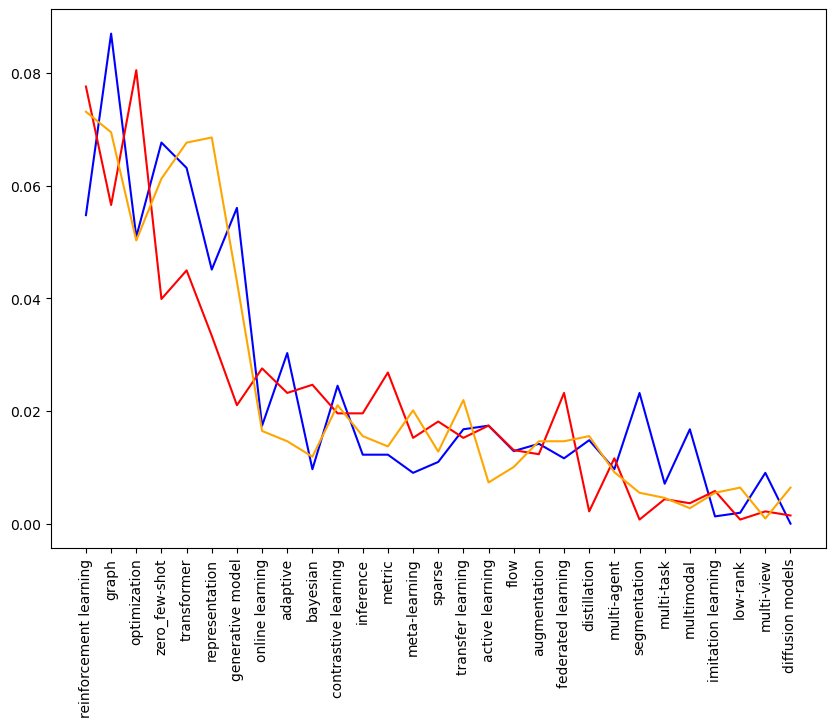

In [53]:
plt.figure(figsize=(10,7))
plt.plot(topics, AAAI22_ratio, label='AAAI-2022', color='blue')
plt.plot(topics, ICML22_ratio, label='ICML-2022', color='red')
plt.plot(topics, ICLR22_ratio, label='ICLR-2022', color='orange')
plt.xticks(rotation=90)
plt.savefig('./figures/ICLR_AAAI_ICLR_ratio_cmp.jpg')